In [122]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.lines as mlines
import hydrocyclone

# Static Recovery: Variance Analysis

In [123]:
burn = 25000
frame = 14
ns = [2,3,4,5, 6, 7]
n_bdy = 32
n_sensor = 8

In [124]:
pmm_variances = []
coll_variances = []
actual_ns = []
for n in ns:
    pmm_name = 'results/static_recovery_f{}_n={}/'.format(frame, n)
    coll_name = 'results/static_recovery_f{}_n={}_collocation/'.format(frame, n)
    pmm_samples = np.load(os.path.join(pmm_name, 'results.npy'))
    coll_samples = np.load(os.path.join(coll_name, 'results.npy'))
    
    actual_n = len(hydrocyclone.grids.construct_circular(n, n_bdy, n_sensor).interior_plus_boundary)
    actual_ns.append(actual_n)
    
    pmm_average_var = np.mean(np.std(pmm_samples[burn:], axis=0))
    coll_average_var = np.mean(np.std(coll_samples[burn:], axis=0))
    
    pmm_variances.append(pmm_average_var)
    coll_variances.append(coll_average_var)

In [125]:
np.mean(np.std(np.exp(first_samples[burn:]), axis=0))

17.294041696215846

In [126]:
np.mean(np.std(np.exp(second_samples[burn:]), axis=0))

19.521557661485591

In [127]:
pmm_variances

[0.67601211210677781,
 0.68469504934535352,
 0.77726264555688629,
 0.69851927411793613,
 0.62574903316442243,
 0.58453413076976146]

In [128]:
actual_ns

[44, 63, 88, 119, 157, 201]

In [129]:
np.sqrt(first_samples.shape[1])

13.30413469565007

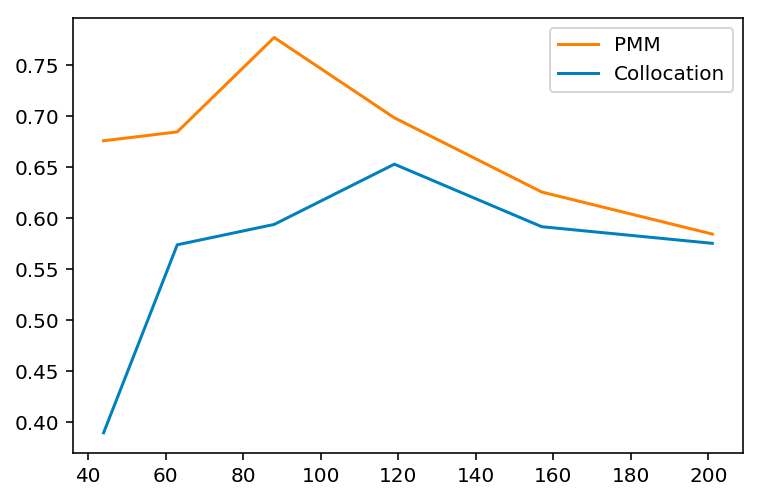

In [130]:
plt.plot(actual_ns, pmm_variances, c=matplotlib.cm.get_cmap('autumn')(0.5), label='PMM')
plt.plot(actual_ns, coll_variances, c=matplotlib.cm.get_cmap('winter')(0.5), label='Collocation')
plt.legend()